把套件讀進來

In [0]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

把鳶尾花的資料集讀進來

In [0]:
iris = load_iris()

確認一下資料集的描述

In [0]:
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

分好 features 跟 target

In [0]:
X = iris.data
Y = iris.target

照著題目的說明，只拿花萼的 features 來用

分好訓練跟測試資料，再把「正確答案」的分佈畫一下做個確認

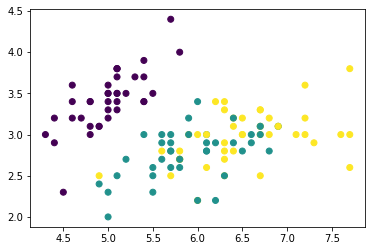

In [0]:
X = X[:, :2]
x_train, x_test, y_train, y_test = train_test_split(X, Y,      
                                   test_size=0.2, random_state=87)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

設定一個 SVM 的函數學習機，把訓練資料放進去 train

In [0]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

稍微瞄一下預測結果跟正確答案的差距，發現大致上做得還不錯！

而且好像比原本用花瓣的 features 還要好！

選擇 features 真的很重要！

In [0]:
y_predict-y_test

array([ 0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1])

當然要畫個圖看一下，這樣還可以確認哪些特殊的情況下模型會分不好

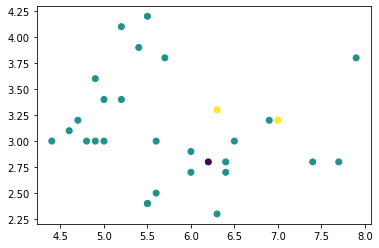

In [0]:
y_predict = clf.predict(x_test)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict-y_test)

也可以畫這種的

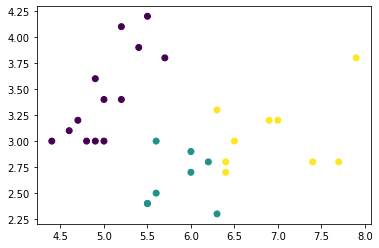

In [16]:
y_predict = clf.predict(x_test)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict)

照著題目的說明，換另一種 SVM 來試試看

In [0]:
from sklearn.svm import NuSVC
clf1 = NuSVC()
clf1.fit(x_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

嗚，好像變差了

但這件事告訴我們，不同的模型在不同的參數情況下，

也會學出不同的結果跟好壞，

因此適時的做實驗調整模型跟參數也是很重要的！

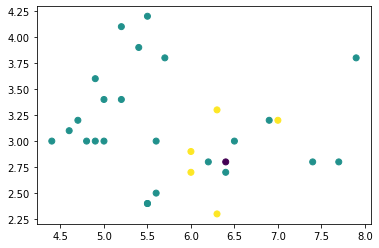

In [0]:
y_predict = clf1.predict(x_test)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict-y_test)